# Motor Fault Detection & Comparison (Software-Based)

This notebook simulates different motor fault conditions using software.
It analyzes signals in time and frequency domains, extracts features,
and classifies motor health.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
from scipy.stats import skew, kurtosis

%matplotlib inline


In [2]:
# PARAMETERS
FS = 1000                 # Sampling frequency (Hz)
T = 1                     # Duration (seconds)
t = np.linspace(0, T, FS)

BASE_FREQ = 50            # Supply frequency (Hz)


In [3]:
# SIGNAL GENERATION
healthy = np.sin(2 * np.pi * BASE_FREQ * t)

bearing = healthy + 0.4 * np.sin(2 * np.pi * 300 * t)

rotor = healthy * (1 + 0.3 * np.sin(2 * np.pi * 5 * t))

stator = healthy + 0.3 * np.random.randn(len(t))


## Time Domain Comparison

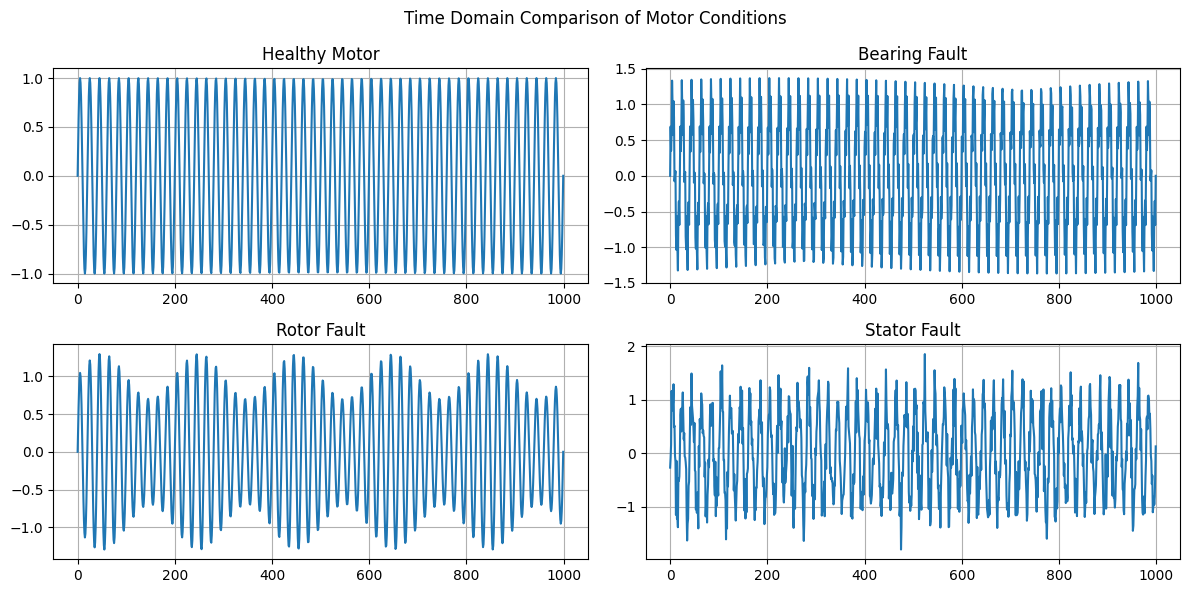

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(healthy)
plt.title("Healthy Motor")
plt.grid()

plt.subplot(2,2,2)
plt.plot(bearing)
plt.title("Bearing Fault")
plt.grid()

plt.subplot(2,2,3)
plt.plot(rotor)
plt.title("Rotor Fault")
plt.grid()

plt.subplot(2,2,4)
plt.plot(stator)
plt.title("Stator Fault")
plt.grid()

plt.suptitle("Time Domain Comparison of Motor Conditions")
plt.tight_layout()
plt.show()


## Frequency Domain Analysis (FFT)


In [5]:
def plot_fft(signal, title):
    N = len(signal)
    fft_vals = np.abs(fft(signal))[:N//2]
    freqs = np.fft.fftfreq(N, 1/FS)[:N//2]

    plt.plot(freqs, fft_vals)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()


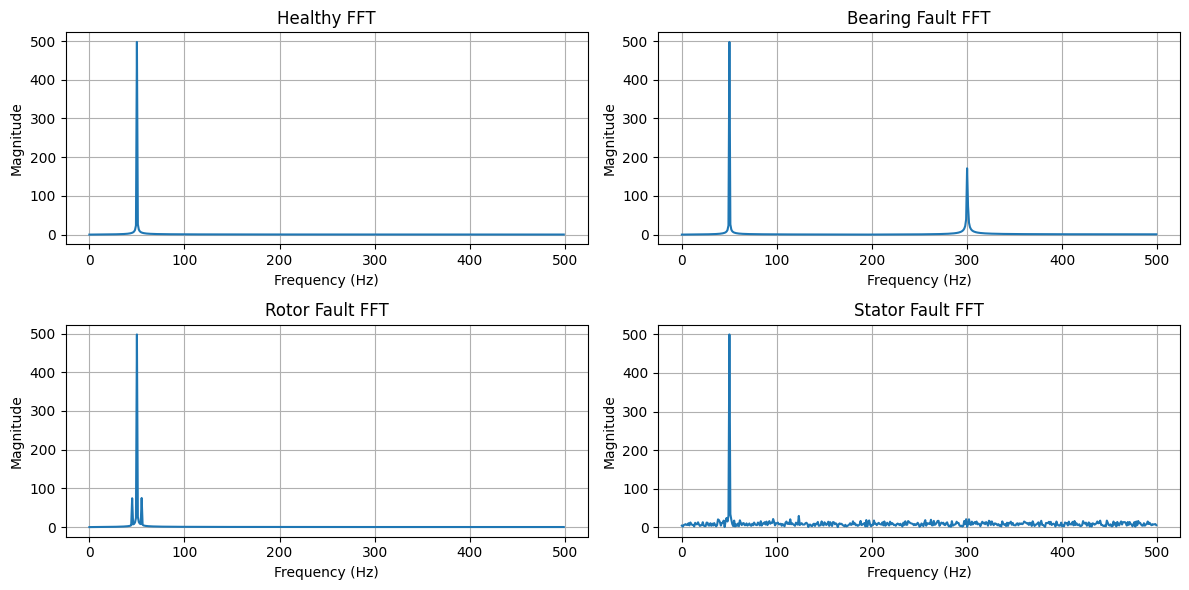

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plot_fft(healthy, "Healthy FFT")

plt.subplot(2,2,2)
plot_fft(bearing, "Bearing Fault FFT")

plt.subplot(2,2,3)
plot_fft(rotor, "Rotor Fault FFT")

plt.subplot(2,2,4)
plot_fft(stator, "Stator Fault FFT")

plt.tight_layout()
plt.show()


## Feature Extraction


In [7]:
def extract_features(signal):
    return {
        "RMS": np.sqrt(np.mean(signal**2)),
        "Mean": np.mean(signal),
        "Variance": np.var(signal),
        "Peak": np.max(np.abs(signal)),
        "Skewness": skew(signal),
        "Kurtosis": kurtosis(signal)
    }


In [8]:
features = {
    "Healthy": extract_features(healthy),
    "Bearing": extract_features(bearing),
    "Rotor": extract_features(rotor),
    "Stator": extract_features(stator)
}

df = pd.DataFrame(features)
df


,Healthy,Bearing,Rotor,Stator
RMS,7.067531e-01,7.611964e-01,7.224801e-01,0.770465
Mean,4.574119e-17,2.220446e-17,2.664535e-17,-0.004083
Variance,4.995000e-01,5.794200e-01,5.219775e-01,0.593599
Peak,9.999988e-01,1.368096e+00,1.296243e+00,1.854068
Skewness,2.239170e-16,-1.567217e-15,3.108826e-16,0.027411
Kurtosis,-1.498498e+00,-1.141423e+00,-1.249612e+00,-1.050575


## Feature Comparison Plot


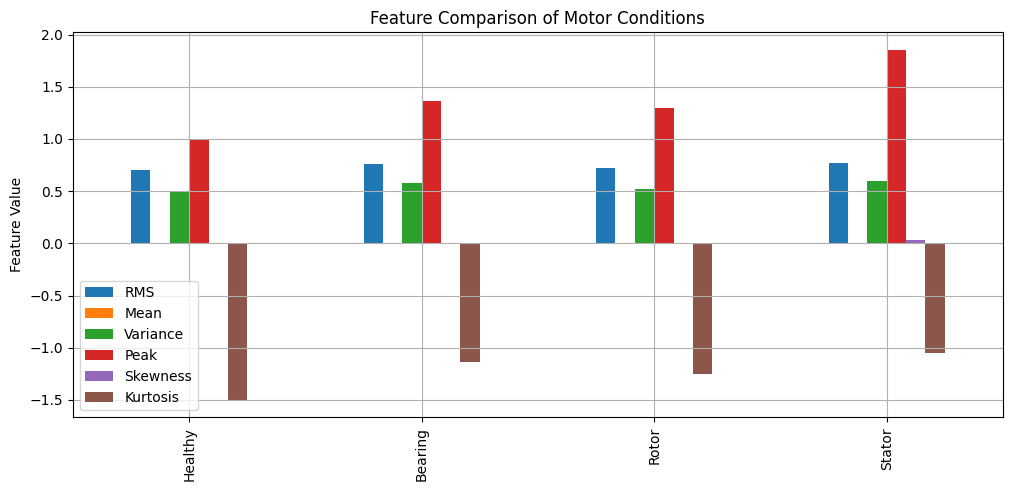

In [9]:
df.T.plot(kind="bar", figsize=(12,5))
plt.title("Feature Comparison of Motor Conditions")
plt.ylabel("Feature Value")
plt.grid()
plt.show()


## Rule-Based Fault Classification


In [10]:
def classify(signal):
    f = extract_features(signal)

    if f["Variance"] > 0.25 and f["Peak"] > 1.5:
        return "Bearing Fault"
    elif f["RMS"] > 1.1:
        return "Rotor Fault"
    elif f["Variance"] > 0.15:
        return "Stator Fault"
    else:
        return "Healthy Motor"


In [11]:
print("CLASSIFICATION RESULTS:")
print("Healthy  →", classify(healthy))
print("Bearing  →", classify(bearing))
print("Rotor    →", classify(rotor))
print("Stator   →", classify(stator))


CLASSIFICATION RESULTS:
Healthy  → Stator Fault
Bearing  → Stator Fault
Rotor    → Stator Fault
Stator   → Bearing Fault


## Real-Time Sliding Window Simulation


In [12]:
WINDOW = 250

print("REAL-TIME SIMULATION OUTPUT:")
for i in range(0, len(bearing) - WINDOW, WINDOW):
    segment = bearing[i:i+WINDOW]
    print(f"Window {i}-{i+WINDOW} → {classify(segment)}")


REAL-TIME SIMULATION OUTPUT:
Window 0-250 → Stator Fault
Window 250-500 → Stator Fault
Window 500-750 → Stator Fault
